In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
utr_seq = pd.read_excel('../raw_data/yamanishi/sb300116y_si_002.xls', header = 1)
utr_seq = utr_seq.loc[:,['Gene Name', 'Sequence of amplified region']]
utr_seq.rename(columns = {'Gene Name':'gene', 'Sequence of amplified region':'utr_seq'}, inplace = True)

In [3]:
genes_fi = pd.read_excel('../raw_data/41592_2018_45_MOESM4_ESM.xlsx', skiprows = 6)
genes_fi = genes_fi.loc[:,['Standard Name', 'intensity']]
genes_fi.rename(columns = {'Standard Name':'gene'}, inplace = True)

C:\Users\dabaf\anaconda3\envs\venv\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
df = pd.merge(genes_fi, utr_seq)
df = df.loc[df.intensity.notna()]
df

,gene,intensity,utr_seq
0,SSA1,11.906396,GATTAAGCCAATTGGTGCGGCAATTGATAATAACGAAAATGTCTTT...
1,ERP2,0.299776,TACGTTTAAGAACTTTTCAATCTACGAAAAATATATGTCCGCAATA...
2,FUN14,0.455914,GCAAGACAAATGACCAGATATAAACGAGGGTTATATTCTTTCGTTT...
3,SPO7,0.027090,AAGAGTTGGAGGGCTTCTTCCTTCGAATAAGAGGTCATATTTACCT...
5,SWC3,0.031941,GGTGTTCGGTTACTTTATTCTGCTTTAACGCCATTATGATTATACA...
...,...,...,...
4022,OPT2,0.004747,CTAGAACTTTTCTTAGAACGCTATCATTTCTTTATTTTTTTTTCTC...
4023,SGE1,0.001582,CAATGAACAATTTTCCAACGTATAAATTAACTTATCGTAGTTCGAT...
4024,ARR1,0.000000,TATTCTTCCTGTAAGCACAGCGCAACATTGTCTTTCTTATTGTTAA...
4025,ARR2,0.012131,GCTCCTCAAGCTTTATTGTTCCAGCATTAATGTAAAAGTCTTTTCA...


### Sequence features extraction

In [5]:
# Length of the sequence
df['len_seq'] = [len(i) for i in df.loc[:,'utr_seq']]

In [6]:
# AT/GC ratio
df['at_gc'] = [(i.count('A')+i.count('T'))/(i.count('G')+i.count('C')) for i in df.loc[:,'utr_seq']]

In [7]:
# Presence of efficiency element
efficiency_el = 'TATATA'
df['eff_el'] = [i.count(efficiency_el) for i in df['utr_seq']] # should be binary?

In [8]:
# Puf protein binding sites

In [9]:
# k-mers TF-IDF

In [10]:
df

,gene,intensity,utr_seq,len_seq,at_gc,eff_el
0,SSA1,11.906396,GATTAAGCCAATTGGTGCGGCAATTGATAATAACGAAAATGTCTTT...,426,1.878378,3
1,ERP2,0.299776,TACGTTTAAGAACTTTTCAATCTACGAAAAATATATGTCCGCAATA...,474,2.268966,0
2,FUN14,0.455914,GCAAGACAAATGACCAGATATAAACGAGGGTTATATTCTTTCGTTT...,404,2.060606,0
3,SPO7,0.027090,AAGAGTTGGAGGGCTTCTTCCTTCGAATAAGAGGTCATATTTACCT...,474,1.677966,0
5,SWC3,0.031941,GGTGTTCGGTTACTTTATTCTGCTTTAACGCCATTATGATTATACA...,437,1.993151,0
...,...,...,...,...,...,...
4022,OPT2,0.004747,CTAGAACTTTTCTTAGAACGCTATCATTTCTTTATTTTTTTTTCTC...,465,2.100000,0
4023,SGE1,0.001582,CAATGAACAATTTTCCAACGTATAAATTAACTTATCGTAGTTCGAT...,428,2.343750,1
4024,ARR1,0.000000,TATTCTTCCTGTAAGCACAGCGCAACATTGTCTTTCTTATTGTTAA...,447,2.000000,2
4025,ARR2,0.012131,GCTCCTCAAGCTTTATTGTTCCAGCATTAATGTAAAAGTCTTTTCA...,496,1.987952,1


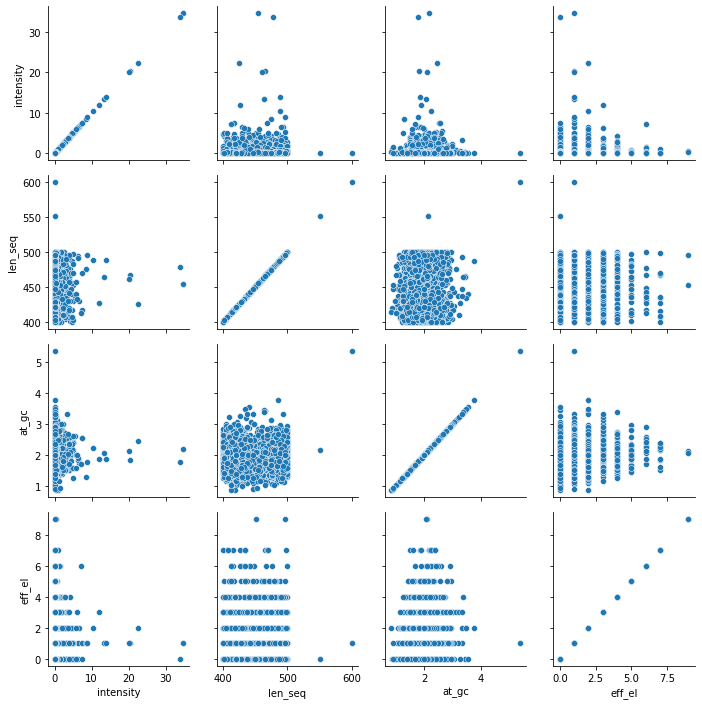

In [11]:
ax = sns.PairGrid(df)
ax.map(sns.scatterplot)